# **Install Libary**

In [ ]:
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.3 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **Loading Liabary and Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML project/Final /fake_real.csv', sep=',', encoding='utf-8', quotechar='"')


# **Read the dataset**

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,title,text,subject,date,type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON - The head of a conservative Republ...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON - Transgender people will be allowe...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON - The special counsel investigation...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON - Trump campaign adviser George Pap...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON - President Donald Trump ca...,politicsNews,"December 29, 2017",True


In [ ]:
# Display the last few rows of the DataFrame
df.tail()

,title,text,subject,date,type
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
print("\nDimensions of the DataFrame:")
df.shape


Dimensions of the DataFrame:


(44898, 5)

In [ ]:
# Get a concise summary of the DataFrame including column data types and non-null values
print("\nSummary of the DataFrame:")
df.info()


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   type     44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
# Check for missing values in each column
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


title      0
text       0
subject    0
date       0
type       0
dtype: int64

In [ ]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
df.describe()


Summary statistics of numerical columns:


,title,text,subject,date,type
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",Fake
freq,14,627,11272,182,23481


In [ ]:
# Visualize the distribution of content lengths using a histogram
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [ ]:
# Remove unwanted column ('Unnamed: 0','Title', 'Type')
df=df.drop(['title','subject','date'],axis=1)
df.head(1)


,text,type
0,WASHINGTON - The head of a conservative Republ...,True


In [ ]:
df.tail(1)

,text,type
44897,21st Century Wire says As 21WIRE predicted in ...,Fake


In [ ]:
# Display unique values in the 'type' column
print("\nUnique values in the 'type' column:")
df['type'].unique()


Unique values in the 'type' column:


array(['True', 'Fake'], dtype=object)

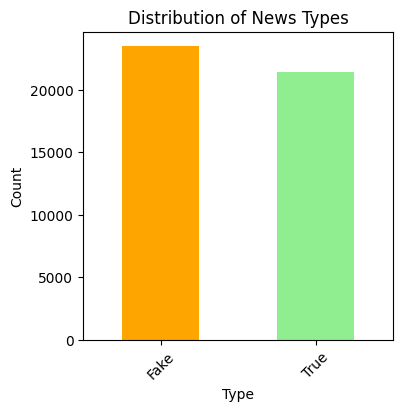

In [ ]:
# Explore unique values in the 'Type' column
type_counts = df['type'].value_counts()

# Define colors for different types
colors = ['orange','lightgreen']

# Plot the counts
plt.figure(figsize=(4, 4))
type_counts.plot(kind='bar', color=colors)
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Text Processing with spaCy and nltk**

In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already present
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def process_text(text):
    # Function to remove punctuation marks from text
    def remove_punctuation(text):
        punctuation_pattern = r'[^\w\s]'
        cleaned_text = re.sub(punctuation_pattern, '', text)
        return cleaned_text

    # Function to remove special characters and numbers from text
    def remove_special_characters_and_numbers(text):
        special_characters_and_numbers_pattern = r'[^a-zA-Z\s]'
        cleaned_text = re.sub(special_characters_and_numbers_pattern, '', text)
        return cleaned_text

    # Function to remove digits from text
    def remove_digits(text):
        digit_pattern = r'\d+'
        cleaned_text = re.sub(digit_pattern, '', text)
        return cleaned_text

    # Function to convert text to lowercase
    def convert_to_lowercase(text):
        return text.lower()

    # Function to remove stopwords from tokens using NLTK
    def remove_stopwords(tokens):
        stop_words = set(stopwords.words('english'))
        return [token for token in tokens if token not in stop_words]

    # Function to join tokens back into a single string
    def join_tokens(tokens):
        return ' '.join(tokens)

    # Tokenization and lemmatization using spaCy
    doc = nlp(text)
    tokens_spacy = [token.lemma_ for token in doc]

    cleaned_text = remove_punctuation(text)
    cleaned_text = remove_special_characters_and_numbers(cleaned_text)
    cleaned_text = remove_digits(cleaned_text)  # Remove digits
    cleaned_text = convert_to_lowercase(cleaned_text)
    tokens = word_tokenize(cleaned_text)  # Tokenization using NLTK
    tokens = remove_stopwords(tokens)
    tokens.extend(tokens_spacy)  # Add spaCy tokens
    processed_text = join_tokens(tokens)

    return processed_text

# Apply the process_text function to the 'text' column of DataFrame 2
df['Processed_Text'] = df['text'].apply(process_text)


**Vector Representation of Processed_Text**

In [ ]:
import spacy

# Load spaCy model with pre-trained word vectors
#medium-sized English model of spaCy
nlp = spacy.load("en_core_web_md")

# Function to obtain Word2Vec embeddings for text
def get_word2vec_embeddings_batch(texts):
    text_vectors = []
    for text in texts:
        tokens = nlp(text)
        word_vectors = [token.vector for token in tokens if not token.is_punct and not token.is_space]
        if word_vectors:
            text_vector = sum(word_vectors) / len(word_vectors)
        else:
            text_vector = None
        text_vectors.append(text_vector)
    return text_vectors

# Apply the function to the processed_Text column in batches
batch_size = 100  # Adjust the batch size as needed
num_batches = (len(df) + batch_size - 1) // batch_size
vectors = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df))
    batch_texts = df['processed_Text'][start_idx:end_idx]
    batch_vectors = get_word2vec_embeddings_batch(batch_texts)
    vectors.extend(batch_vectors)

# Store the resulting vectors in the 'vector' column of the DataFrame
df['vector'] = vectors


In [ ]:
# Check the type of the 'vector' column
print(df['vector'].dtype)

object


In [ ]:
unique_types = df['vector'].apply(type).unique()
print(unique_types)

[<class 'str'> <class 'float'>]


In [ ]:
import numpy as np

# Function to convert string representations to numpy arrays
def parse_vector_string(vector_string):
    if isinstance(vector_string, str):
        # Remove square brackets and split by whitespace
        values = vector_string[1:-1].split()
        # Convert values to floats and return numpy array
        return np.array(values, dtype=float)
    elif vector_string is None:
        # If the input is None, return None
        return None
    else:
        # If the input is already a numpy array, return it as is
        return vector_string

# Convert 'vector' column to numpy arrays
df['vector'] = df['vector'].apply(parse_vector_string)

# Check the type of the 'vector' column after conversion
print(df['vector'].apply(type).unique())

[<class 'numpy.ndarray'> <class 'float'>]


In [ ]:
# Display the DataFrame after adding the vector column
df.head()

,text,type,processed_Text,vector
0,WASHINGTON- The head of a conservative Republi...,True,washington reuter head conservative republic...,"[-0.81997824, 0.5995497, -2.5212972, 0.6614114..."
1,WASHINGTON- Transgender people will be allowed...,True,washington reuters transgender people allow ...,"[-0.68455237, 0.76636398, -1.6749181, 1.137119..."
2,WASHINGTON- The special counsel investigation ...,True,washington reuter special counsel investigat...,"[0.108025201, 0.61971724, -1.7575599, 1.349151..."
3,WASHINGTON- Trump campaign adviser George Papa...,True,washington reuters trump campaign adviser ge...,"[-0.390371442, -0.206498355, -1.27466476, 0.79..."
4,SEATTLE/WASHINGTON- President Donald Trump cal...,True,seattlewashington reuters president donald t...,"[-0.648751736, -0.465459138, -1.50599909, 1.10..."


# **Visualization**


**Basic Statistics**

In [ ]:
import matplotlib.pyplot as plt

# Calculate basic statistics and plot for each type
types = df['type'].unique()

for t in types:
    type_df = df[df['type'] == t]
    num_documents = len(type_df)
    avg_length = type_df['processed_Text'].apply(len).mean()
    max_length = type_df['processed_Text'].apply(len).max()
    min_length = type_df['processed_Text'].apply(len).min()

    print("\nType:", t)
    print("Number of documents:", num_documents)
    print("Average length of documents:", avg_length)
    print("Maximum length of documents:", max_length)
    print("Minimum length of documents:", min_length)



Type: True
Number of documents: 21417
Average length of documents: 1566.7375449409349
Maximum length of documents: 16209
Minimum length of documents: 1

Type: Fake
Number of documents: 23481
Average length of documents: 1596.7473702142158
Maximum length of documents: 36961
Minimum length of documents: 1


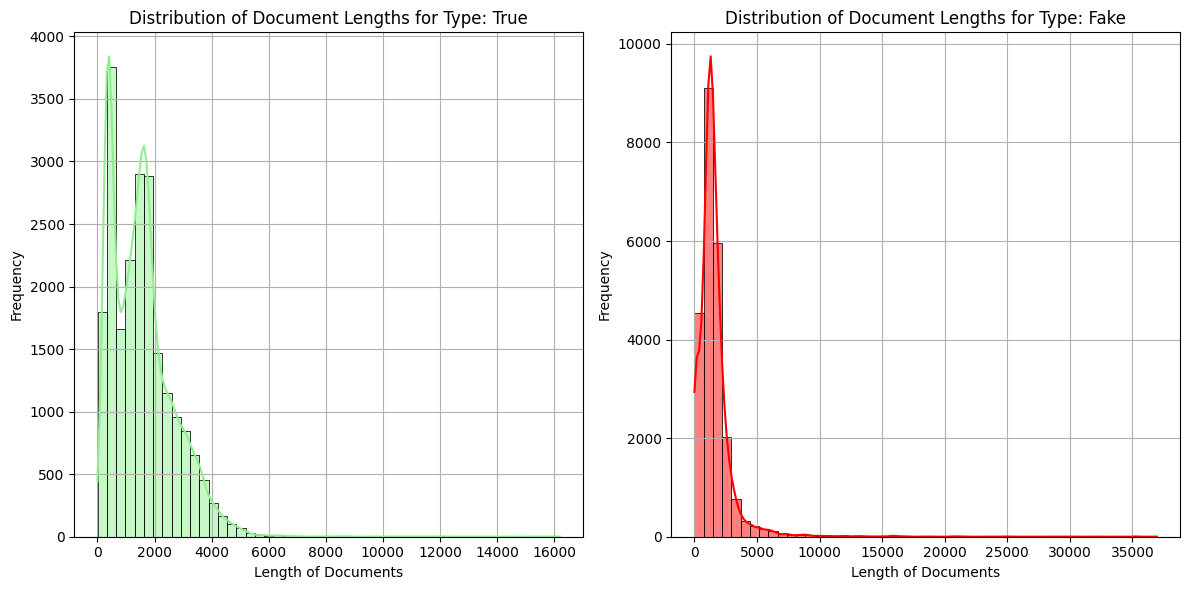

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of document lengths with different colors
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, t in enumerate(types):
    type_df = df[df['type'].str.lower() == t.lower()]
    color = 'red' if t.lower() == 'fake' else 'lightgreen'
    sns.histplot(type_df['processed_Text'].apply(len), bins=50, kde=True, color=color, ax=axes[i])
    axes[i].set_title('Distribution of Document Lengths for Type: {}'.format(t.capitalize()))
    axes[i].set_xlabel('Length of Documents')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


**Vocabulary Analysis**


Type: True
Size of Vocabulary: 67603
Number of Rare Words (frequency = 1): 26440
Assigned Colors: ['lightgreen', 'darkgreen']

Type: Fake
Size of Vocabulary: 164095
Number of Rare Words (frequency = 1): 75789
Assigned Colors: ['red', 'lightcoral']


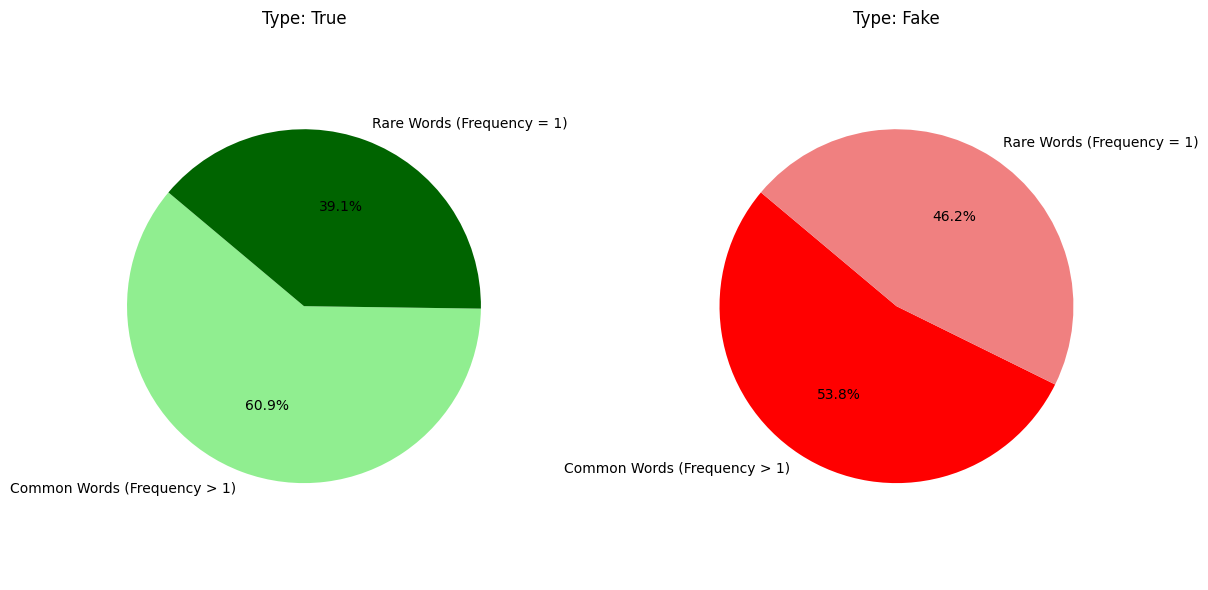

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize an empty defaultdict to store word frequencies for each type
word_freq_by_type = defaultdict(lambda: defaultdict(int))

# Initialize variables to store vocabulary size and rare word count for each type
vocabulary_size_by_type = defaultdict(int)
num_rare_words_by_type = defaultdict(int)

# Set the batch size for updating word frequencies
batch_size = 1000  # Adjust as needed

# Iterate over each document to update word frequencies incrementally
for i, (text, type_) in enumerate(zip(df['processed_Text'], df['type']), start=1):
    tokens = text.split()  # Assuming the text is preprocessed and tokenized
    for token in tokens:
        word_freq_by_type[type_][token] += 1  # Update word frequencies for each type

    # Update vocabulary size and count rare words after processing a batch of documents
    if i % batch_size == 0 or i == len(df):
        for t in word_freq_by_type.keys():
            vocabulary_size_by_type[t] = len(word_freq_by_type[t])
            num_rare_words_by_type[t] = sum(1 for freq in word_freq_by_type[t].values() if freq == 1)

# Output vocabulary statistics and plot the distribution of rare words versus common words for each type
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns

# Define color maps for each type
color_map = {
    "fake": ["red", "lightcoral"],
    "true": ["lightgreen", "darkgreen"]
}

# Collect unique types
unique_types = list(word_freq_by_type.keys())

# Plot only the first two types
for idx, t in enumerate(unique_types[:2]):
    print("\nType:", t)
    print("Size of Vocabulary:", vocabulary_size_by_type[t])
    print("Number of Rare Words (frequency = 1):", num_rare_words_by_type[t])

    # Plot the distribution of rare words versus common words for each type
    labels = ['Common Words (Frequency > 1)', 'Rare Words (Frequency = 1)']
    sizes = [vocabulary_size_by_type[t] - num_rare_words_by_type[t], num_rare_words_by_type[t]]

    colors = color_map.get(t.lower(), ["gray", "lightgray"])  # Convert type to lowercase and get colors
    print("Assigned Colors:", colors)

    ax = axs[idx]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Type: {t}')
    ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

plt.tight_layout()
plt.show()


**Sentiment Analysis**

Sentiment scores for the first few documents:
   type  Sentiment
0  True  -0.000631
1  True   0.101243
2  True   0.173021
3  True   0.016276
4  True   0.021037
Number of fake news documents: 23481
Number of true news documents: 21417


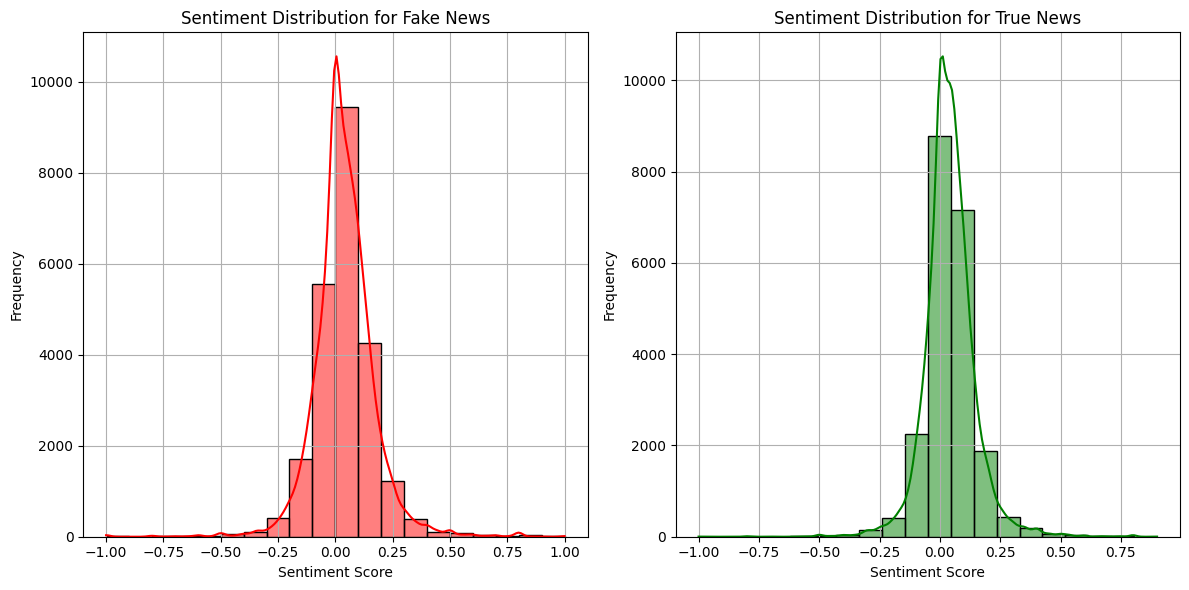

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate sentiment score using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Check if the necessary columns exist
if 'processed_Text' not in df.columns or 'type' not in df.columns:
    print("Required columns are not present in the dataframe.")
else:
    # Apply sentiment analysis to each document
    df['Sentiment'] = df['processed_Text'].apply(get_sentiment)

    # Print sentiment scores for the first few documents
    print("Sentiment scores for the first few documents:")
    print(df[['type', 'Sentiment']].head())

    # Ensure there are both fake and true types in the dataframe
    fake_count = df[df['type'] == 'Fake'].shape[0]
    true_count = df[df['type'] == 'True'].shape[0]

    print(f"Number of fake news documents: {fake_count}")
    print(f"Number of true news documents: {true_count}")

    if fake_count == 0 or true_count == 0:
        print("Dataframe does not contain both 'fake' and 'true' news.")
    else:
        # Create subplots for each type
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

        # Plot sentiment scores for 'Fake' type
        sns.histplot(df[df['type'] == 'Fake']['Sentiment'], bins=20, kde=True, color='red', alpha=0.5, ax=axes[0])
        axes[0].set_title('Sentiment Distribution for Fake News')
        axes[0].set_xlabel('Sentiment Score')
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True)

        # Plot sentiment scores for 'True' type
        sns.histplot(df[df['type'] == 'True']['Sentiment'], bins=20, kde=True, color='green', alpha=0.5, ax=axes[1])
        axes[1].set_title('Sentiment Distribution for True News')
        axes[1].set_xlabel('Sentiment Score')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()


**Word Frequency Analysis: WordCloud for fake and real news separately**

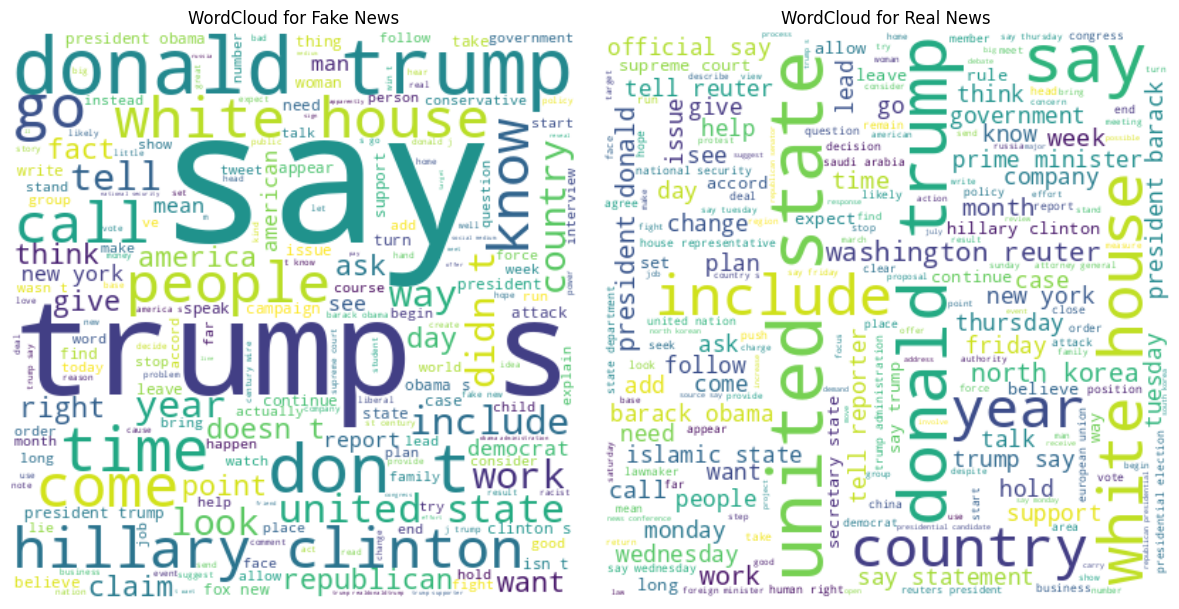

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter fake news
fake_news_text = ' '.join(df[df['type'] == 'Fake']['processed_Text'])

# Generate WordCloud for fake news
fake_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(fake_news_text)

# Filter real news
real_news_text = ' '.join(df[df['type'] == 'True']['processed_Text'])

# Generate WordCloud for real news
real_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(real_news_text)

# Plot both WordClouds side by side
plt.figure(figsize=(12, 6))

# Plot WordCloud for fake news
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Fake News')
plt.axis('off')

# Plot WordCloud for real news
plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Real News')
plt.axis('off')

plt.tight_layout()
plt.show()


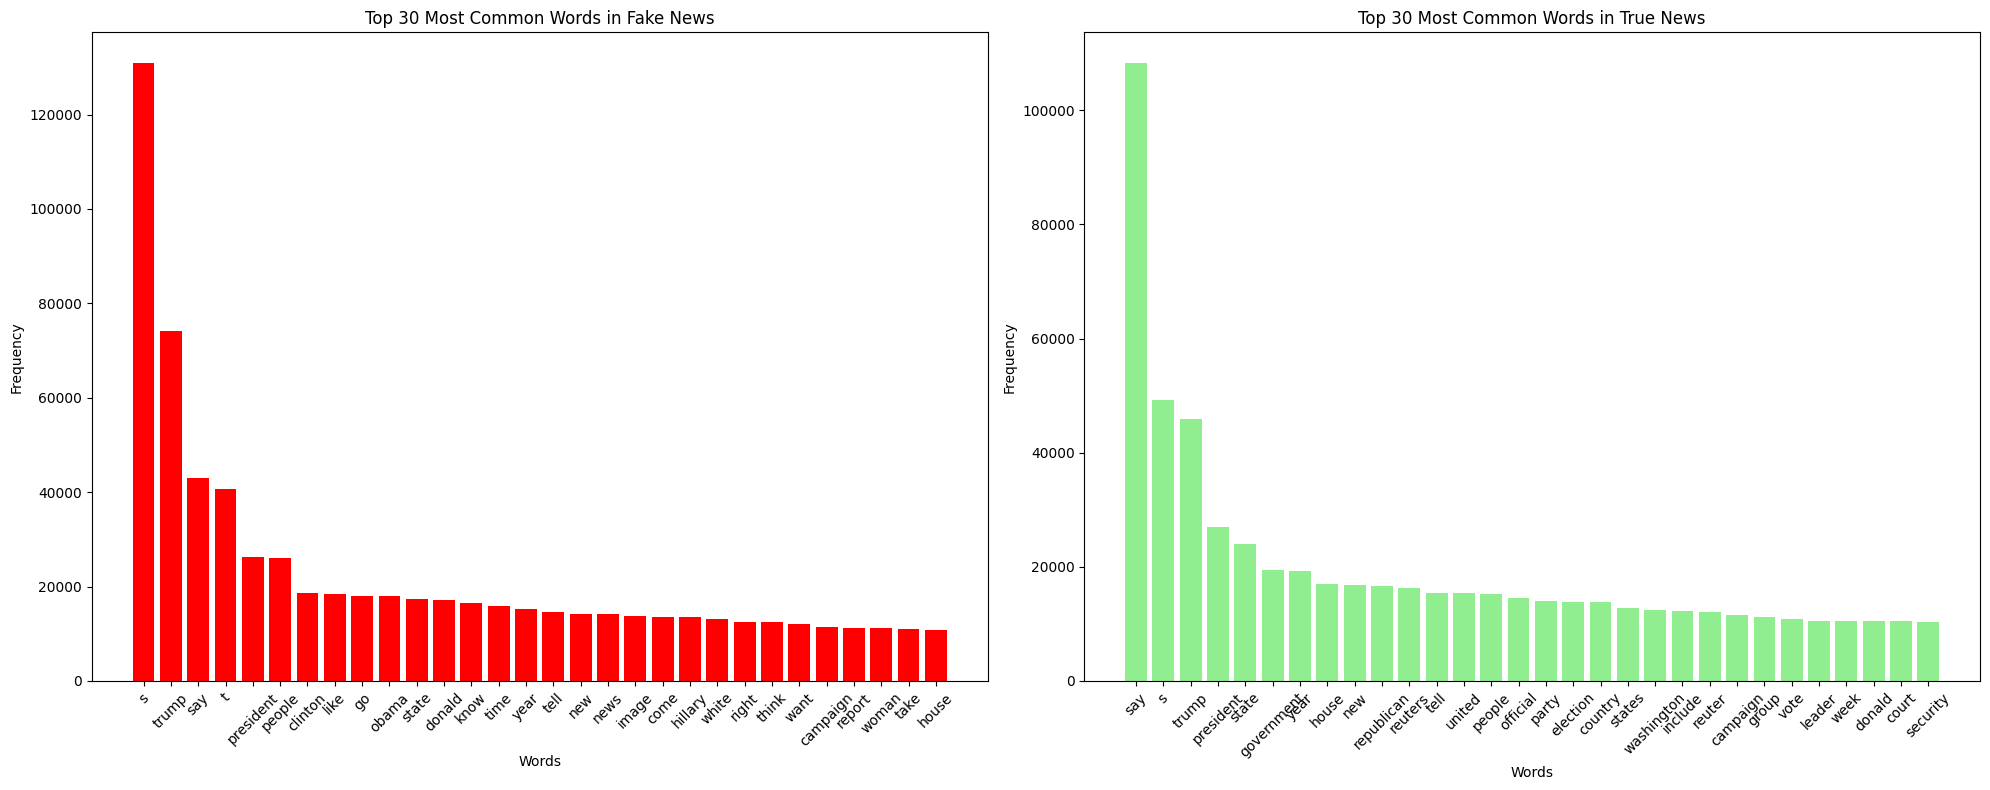

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Define a function to calculate word frequency and plot the bar chart
def plot_word_frequency(df, type_filter, top_n=10, ax=None):
    # Filter data by type
    filtered_data = df[df['type'].str.lower() == type_filter.lower()]

    # Join all the content for the specified type
    text = ' '.join(filtered_data['processed_Text'])

    # Tokenize the text
    tokens = text.split()

    # Calculate word frequency
    word_freq = Counter(tokens)

    # Get the top N most common words
    top_words = dict(word_freq.most_common(top_n))

    # Plot bar chart
    colors = ['red' if type_filter.lower() == 'fake' else 'lightgreen'] * top_n
    ax.bar(top_words.keys(), top_words.values(), color=colors)
    ax.set_title(f'Top {top_n} Most Common Words in {type_filter.capitalize()} News')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# Specify the types for which you want to plot word frequency
types_to_plot = ['fake', 'true']

# Create subplots for each type
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot word frequency for each type
for i, t in enumerate(types_to_plot):
    plot_word_frequency(df, t, top_n=30, ax=axes[i])

plt.tight_layout()
plt.show()


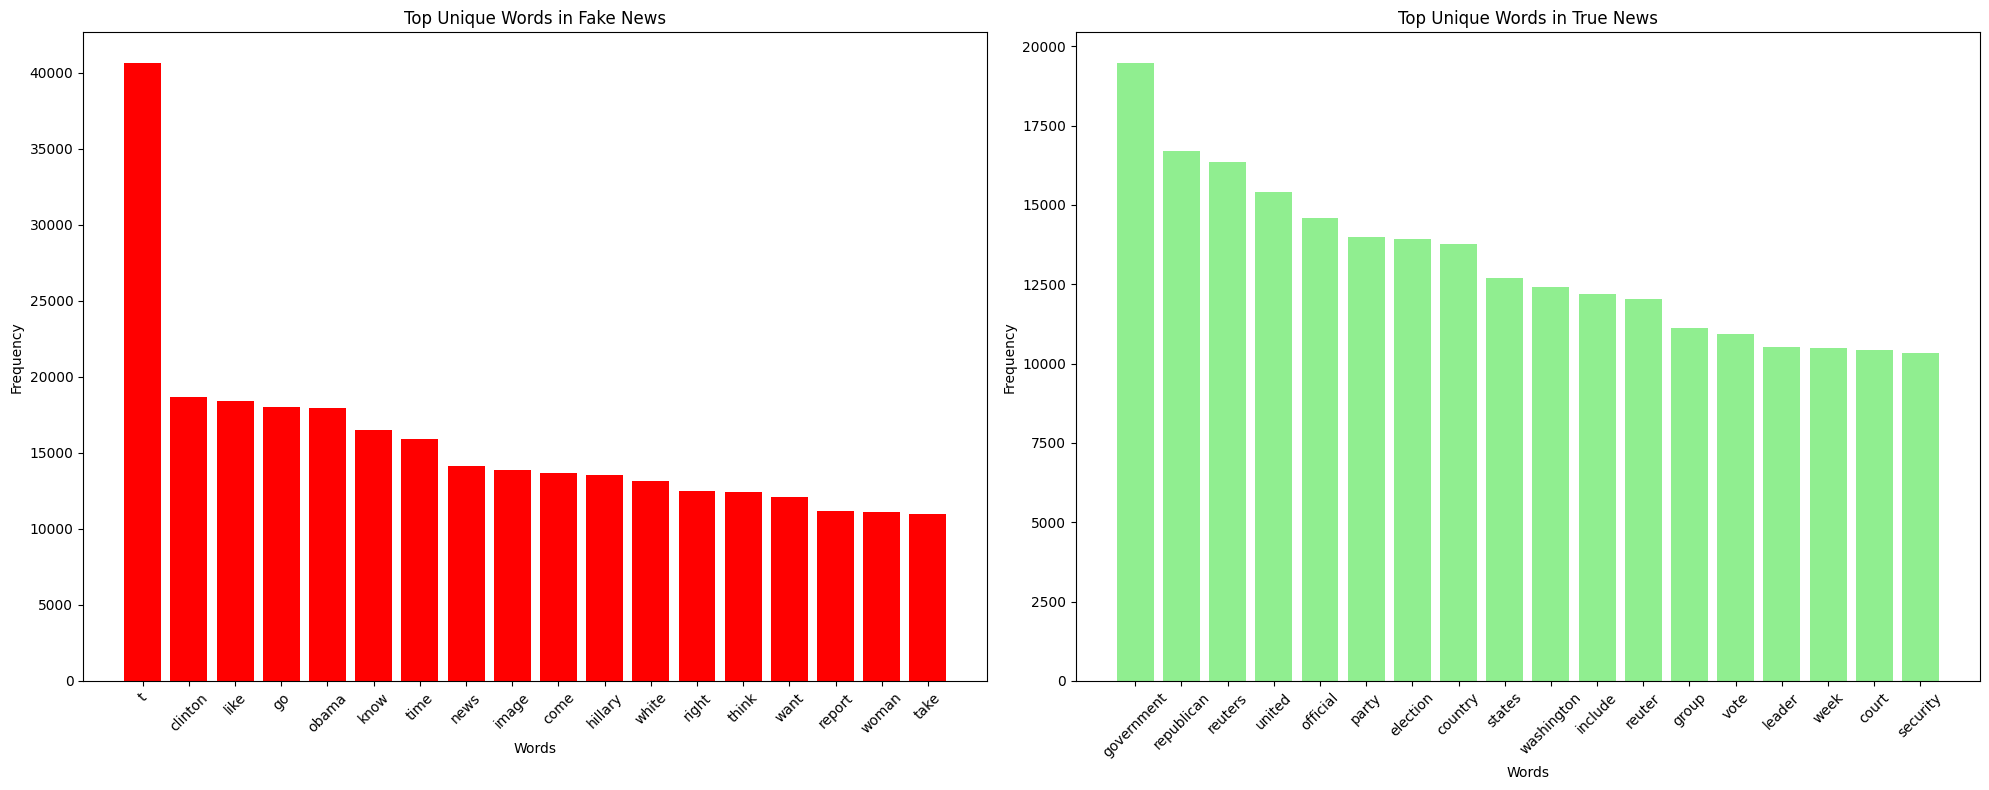

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to get the top N most common words for a given type
def get_top_words(df, type_filter, top_n=30):
    filtered_data = df[df['type'].str.lower() == type_filter.lower()]
    text = ' '.join(filtered_data['processed_Text'])
    tokens = text.split()
    word_freq = Counter(tokens)
    top_words = word_freq.most_common(top_n)
    return dict(top_words)

# Get the top 30 words for both 'fake' and 'true' types
top_fake_words = get_top_words(df, 'fake', top_n=30)
top_true_words = get_top_words(df, 'true', top_n=30)

# Find words that are unique to each type
unique_fake_words = {word: count for word, count in top_fake_words.items() if word not in top_true_words}
unique_true_words = {word: count for word, count in top_true_words.items() if word not in top_fake_words}

# Function to plot unique words
def plot_unique_words(unique_words, type_filter, ax):
    colors = ['red' if type_filter.lower() == 'fake' else 'lightgreen'] * len(unique_words)
    ax.bar(unique_words.keys(), unique_words.values(), color=colors)
    ax.set_title(f'Top Unique Words in {type_filter.capitalize()} News')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# Create subplots for unique words
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot unique words for 'fake' and 'true' types
plot_unique_words(unique_fake_words, 'fake', ax=axes[0])
plot_unique_words(unique_true_words, 'true', ax=axes[1])

plt.tight_layout()
plt.show()


**Topic Models**

In [ ]:
# Read the dataset from the specified path
df = pd.read_csv('/content/drive/MyDrive/ML project/Final /fake_real_v.csv', sep=',', encoding='utf-8', quotechar='"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import LdaModel
from gensim import corpora

# Create a Gensim dictionary mapping each word to a unique integer ID
dictionary = corpora.Dictionary(df['processed_Text'].apply(lambda x: x.split()))

# Create a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc.split()) for doc in df['processed_Text']]

# Train an LDA model on the corpus with the desired number of topics
num_topics = 20  # Adjust the number of topics as needed
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary)

# Function to infer topic distribution for each document and return as vector representation
def infer_lda_vector(text):
    bow_vector = dictionary.doc2bow(text.split())
    lda_vector = lda_model[bow_vector]
    return lda_vector

# Apply the function to the processed_Text column
df['vector'] = df['processed_Text'].apply(infer_lda_vector)
# Convert the 'vector' column from list of tuples to numpy array
df['vector'] = df['vector'].apply(lambda x: np.array(x))
# Flatten the 2D arrays into 1D arrays
df['vector'] = df['vector'].apply(lambda x: x.flatten())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


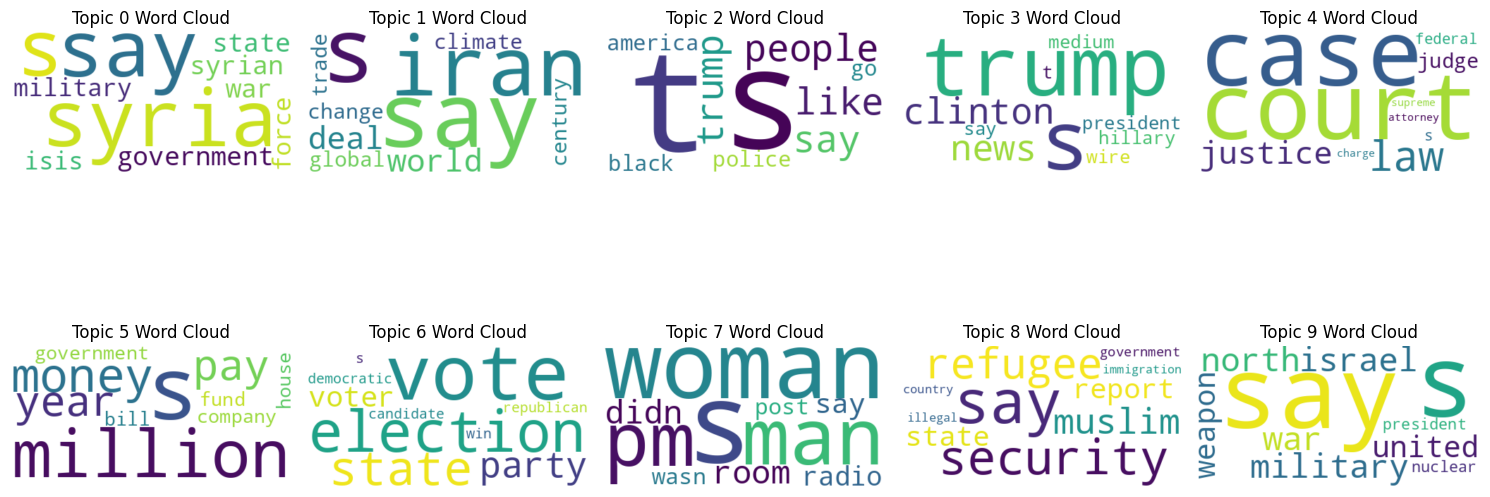

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Print the top words for each topic
topics = lda_model.print_topics(num_topics=10, num_words=10)

# Create subplots with two rows
num_rows = 2
num_cols = len(topics) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, (ax, (topic_id, topic_words)) in enumerate(zip(axes.flatten(), topics)):
    words = topic_words.split('"')[1::2]
    word_freq = {word: 1 for word in words}  # Assign equal frequency for all words
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic_id} Word Cloud')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create the visualization
vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
